# VQA Quantum Compilation Demo

Notebook này demo VQA (Variational Quantum Algorithm) approach cho quantum compilation, tương tự như code gốc trong `dproject.ipynb`.

## Workflow:
1. Setup molecular problem và quantum operators
2. Tính target unitaries bằng ODE solver
3. Train VQA để approximate các target unitaries
4. Evolve quantum states using trained unitaries
5. Calculate và compare dipole moments

## 1. Import modules

In [1]:
# Import modular components
from quantum_setup import setup_molecular_problem, setup_qubit_operators, setup_ansatz
from time_evolution import compute_target_unitaries
from ansatz import create_pauli_labels_from_operators
from optimization import (
    run_vqe, get_vqe_ground_state,
    run_vqa_time_evolution,
    evolve_states_with_vqa_unitaries,
    calculate_dipole_moments_from_states,
    save_cost_history
)
from visualization import (
    plot_optimization_convergence, 
    plot_comparison, 
    setup_matplotlib_style
)
from main_workflow import run_vqa_compilation_workflow
import config

import numpy as np
import matplotlib.pyplot as plt

# Setup plotting style
setup_matplotlib_style()

print("All modules imported successfully!")
print(f"VQA Configuration:")
print(f"  Layers: {config.VQA_NUM_LAYERS}")
print(f"  Steps: {config.VQA_STEPS}")
print(f"  Learning Rate: {config.VQA_LEARNING_RATE}")
print(f"  Error Threshold: {config.VQA_ERROR_THRESHOLD}")

All modules imported successfully!
VQA Configuration:
  Layers: 6
  Steps: 300
  Learning Rate: 0.01
  Error Threshold: 1e-06


## 2. Quick Demo: Run Complete VQA Workflow

In [2]:
# Import optimization modules
from vqc_optimization import (
    run_vqa_time_evolution,
    evolve_states_with_vqa_unitaries,
    calculate_dipole_moments_from_states,
    VQCTracker
)
from optimization import save_cost_history
print("✅ Optimization modules imported successfully")

Running complete VQA compilation workflow...
VQA QUANTUM COMPILATION WORKFLOW
Step 1: Setting up molecular problem...
Number of qubits: 4

Step 2: Setting up qubit operators...
Qubit operators setup complete.

Step 3: Running VQE for ground state...
Number of qubits: 4

Step 2: Setting up qubit operators...
Qubit operators setup complete.

Step 3: Running VQE for ground state...
VQE ground state energy: -1.213230

Step 4: Computing target unitaries...
Bắt đầu tính toán Target Unitaries bằng ODE Solver...
Hoàn thành trong 0.17 giây.
Đã tạo thành công 50 target unitaries.
Computed 50 target unitaries.

Step 5: Creating Pauli labels for VQA...
Number of unique Pauli strings: 19

Step 6: Running VQA quantum compilation...
Starting VQA time evolution simulation with PennyLane

--- Time t = 0.0000 ---
VQE ground state energy: -1.213230

Step 4: Computing target unitaries...
Bắt đầu tính toán Target Unitaries bằng ODE Solver...
Hoàn thành trong 0.17 giây.
Đã tạo thành công 50 target unitaries

## 3. Analyze VQA Training Progress

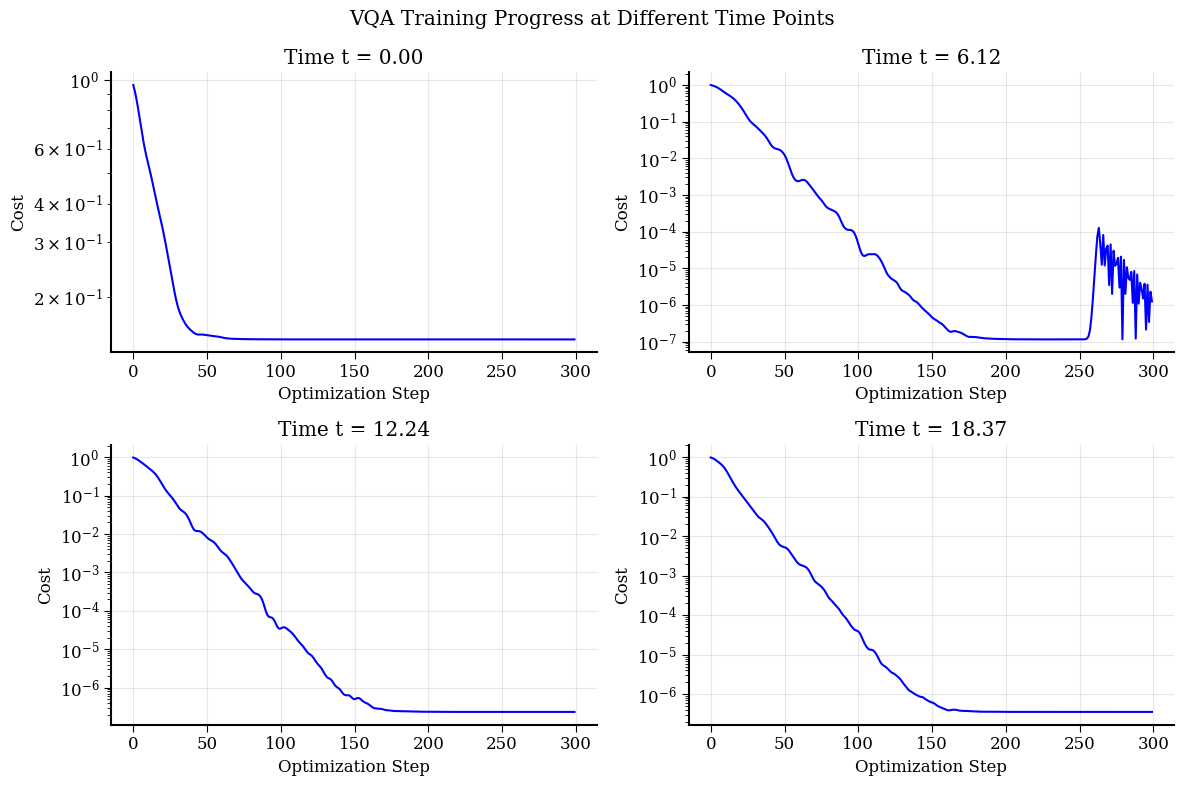

Final costs at each time point:
t =   0.00: Cost = 0.146447, Fidelity = 0.853553
t =   6.12: Cost = 0.000001, Fidelity = 0.999999
t =  12.24: Cost = 0.000000, Fidelity = 1.000000
t =  18.37: Cost = 0.000000, Fidelity = 1.000000
t =  24.49: Cost = 0.000000, Fidelity = 1.000000
t =  30.61: Cost = 0.000001, Fidelity = 0.999999
t =  36.73: Cost = 0.000001, Fidelity = 0.999999
t =  42.86: Cost = 0.146449, Fidelity = 0.853551
t =  48.98: Cost = 0.146448, Fidelity = 0.853552
t =  55.10: Cost = 0.146448, Fidelity = 0.853552


In [3]:
# Plot cost history for a few time points
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

times_to_plot = list(results['cost_histories'].keys())[:4]

for i, t in enumerate(times_to_plot):
    cost_history = results['cost_histories'][t]
    axes[i].plot(cost_history, 'b-', linewidth=1.5)
    axes[i].set_title(f'Time t = {t:.2f}')
    axes[i].set_xlabel('Optimization Step')
    axes[i].set_ylabel('Cost')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_yscale('log')

plt.suptitle('VQA Training Progress at Different Time Points')
plt.tight_layout()
plt.show()

# Print final costs
print("Final costs at each time point:")
for t in sorted(results['cost_histories'].keys())[:10]:  # Show first 10
    final_cost = results['cost_histories'][t][-1]
    final_fidelity = 1.0 - final_cost
    print(f"t = {t:6.2f}: Cost = {final_cost:.6f}, Fidelity = {final_fidelity:.6f}")

## 4. Visualize Dipole Moment Evolution

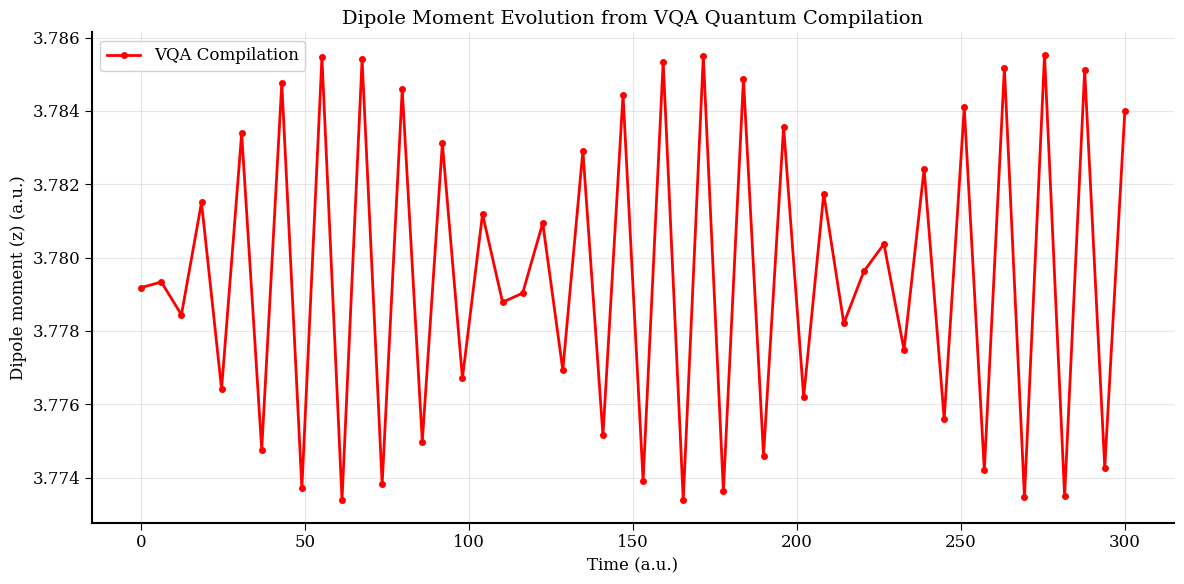

Dipole moment range: [3.773377, 3.785537]
Mean dipole moment: 3.779482
Std dipole moment: 0.004352


In [4]:
# Plot dipole moment from VQA compilation
plt.figure(figsize=(12, 6))
plt.plot(results['times_plot'], results['dipole_moments'], 
         'r-', linewidth=2, marker='o', markersize=4, label='VQA Compilation')

plt.xlabel('Time (a.u.)', fontsize=12)
plt.ylabel('Dipole moment (z) (a.u.)', fontsize=12)
plt.title('Dipole Moment Evolution from VQA Quantum Compilation', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Dipole moment range: [{np.min(results['dipole_moments']):.6f}, {np.max(results['dipole_moments']):.6f}]")
print(f"Mean dipole moment: {np.mean(results['dipole_moments']):.6f}")
print(f"Std dipole moment: {np.std(results['dipole_moments']):.6f}")

## 5. Step-by-Step Demo (Optional)

### 5.1 Setup problem manually

In [5]:
# Manual setup for educational purposes
print("Setting up molecular problem manually...")

# Setup molecular problem
problem, hamiltonian, dipole = setup_molecular_problem()
qubit_ops = setup_qubit_operators(hamiltonian, dipole)

H_0 = qubit_ops['H_0']
H_static = qubit_ops['H_static']
dipole_qubit = qubit_ops['dipole_qubit']
dipole_matrix = qubit_ops['dipole_matrix']

print(f"System info:")
print(f"  Number of qubits: {H_0.num_qubits}")
print(f"  Hamiltonian matrix shape: {H_static.shape}")
print(f"  Number of Pauli terms in H_0: {len(H_0.paulis)}")
print(f"  Number of Pauli terms in dipole: {len(dipole_qubit.paulis)}")

Setting up molecular problem manually...
System info:
  Number of qubits: 4
  Hamiltonian matrix shape: (16, 16)
  Number of Pauli terms in H_0: 15
  Number of Pauli terms in dipole: 11


### 5.2 Compute target unitaries

In [6]:
# Compute target unitaries with smaller time range for faster demo
times_demo = np.linspace(0, 50, 10)  # Smaller range for demo

print("Computing target unitaries for demo...")
target_unitaries, _ = compute_target_unitaries(H_static, dipole_matrix, times_demo)

print(f"Computed {len(target_unitaries)} target unitaries")
print(f"Target unitary shape: {target_unitaries[0].shape}")

# Check unitarity
def check_unitarity(U, tolerance=1e-10):
    U_dag = np.conj(U.T)
    identity = U @ U_dag
    error = np.max(np.abs(identity - np.eye(U.shape[0])))
    return error < tolerance, error

print("\nChecking unitarity of first few targets:")
for i, U in enumerate(target_unitaries[:3]):
    is_unitary, error = check_unitarity(U)
    print(f"  Target {i}: Unitary = {is_unitary}, Error = {error:.2e}")

Computing target unitaries for demo...
Bắt đầu tính toán Target Unitaries bằng ODE Solver...
Hoàn thành trong 0.03 giây.
Đã tạo thành công 10 target unitaries.
Computed 10 target unitaries
Target unitary shape: (16, 16)

Checking unitarity of first few targets:
  Target 0: Unitary = True, Error = 0.00e+00
  Target 1: Unitary = False, Error = 3.40e-07
  Target 2: Unitary = False, Error = 6.86e-07


### 5.3 Train VQA for single time point

In [ ]:
# Import low-level VQA functions for detailed analysis
from vqc_optimization import train_vqa_for_time, vqa_cost, calculate_hst_cost

print("✅ Low-level VQA functions imported")

### 5.4 Plot training progress

In [ ]:
# Plot training progress for demo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Cost
ax1.plot(cost_history_demo, 'b-', linewidth=2)
ax1.set_xlabel('Optimization Step')
ax1.set_ylabel('Cost')
ax1.set_title('Cost Function Convergence')
ax1.grid(True, alpha=0.3)
ax1.set_yscale('log')

# Fidelity
fidelities = [1.0 - c for c in cost_history_demo]
ax2.plot(fidelities, 'r-', linewidth=2)
ax2.set_xlabel('Optimization Step')
ax2.set_ylabel('Fidelity')
ax2.set_title('Fidelity Convergence')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 1.05)

plt.suptitle(f'VQA Training Progress for t = {time_demo:.2f}')
plt.tight_layout()
plt.show()

print(f"Cost improved from {cost_history_demo[0]:.6f} to {cost_history_demo[-1]:.6f}")
print(f"Fidelity improved from {fidelities[0]:.6f} to {fidelities[-1]:.6f}")

## 6. Save Results

In [ ]:
# Save cost history (matching original format)
if 'cost_histories' in results and results['cost_histories']:
    # Get last time point's cost history
    last_time = max(results['cost_histories'].keys())
    last_cost_history = results['cost_histories'][last_time]
    
    save_cost_history(last_cost_history, "vqa_cost_history.txt")
    print(f"Saved cost history for last time point (t = {last_time:.2f})")

# Save dipole moments
if 'dipole_moments' in results:
    dipole_data = np.column_stack([results['times_plot'], results['dipole_moments']])
    np.savetxt("vqa_dipole_moments.txt", dipole_data, 
               header="Time(a.u.)  Dipole_Moment(a.u.)", fmt="%.6f")
    print("Saved dipole moments to vqa_dipole_moments.txt")

print("All results saved successfully!")

## Kết luận

Notebook này demo approach VQA (Variational Quantum Algorithm) cho quantum compilation, tương tự như code gốc của bạn. 

### Key Features:
1. **Modular design**: Code được tổ chức thành các modules riêng biệt
2. **VQA implementation**: Faithful reproduction của VQA approach gốc
3. **Target unitaries**: Tính toán bằng ODE solver chính xác
4. **Cost function**: Sử dụng HST (Hilbert-Schmidt Test) distance
5. **Optimization**: Adam optimizer với learning rate scheduling
6. **Visualization**: Comprehensive plotting và analysis tools

### Workflow Summary:
1. Setup molecular problem (H2 molecule)
2. Compute target unitaries từ time evolution
3. Train VQA để approximate target unitaries at each time
4. Evolve quantum states using trained unitaries
5. Calculate dipole moments và compare với exact results

### Performance Notes:
- VQA training có thể mất thời gian với large number of time points
- Cost function convergence depends on ansatz depth và learning rate
- Fidelity typically improves với more optimization steps

Code này maintain tính tương thích với original approach nhưng organized theo modular fashion để dễ maintain và extend.